<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/master/imgaug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://github.com/aleju/imgaug
# use this to test your image augmentation

In [0]:
# define variables
import os
repository_url = 'https://github.com/JonathanLehner/Colab-collection'
repository_name = os.path.basename(repository_url)
loader_path = './products.py'

products_model = 'https://github.com/JonathanLehner/Colab-collection/releases/download/0.1/mask_rcnn_products_0060.h5'
products_model_name = os.path.basename(products_model)
products_data_url = 'https://github.com/JonathanLehner/Colab-collection/releases/download/0.1/labeled_training_images3.0.zip'
products_filename = os.path.basename(products_data_url)
products_filename_wo_ext = 'labeled_training_images'

In [6]:
# download training dataset
os.system('wget {0}'.format(products_data_url))
print('unzip {0}'.format(products_filename))
os.system('unzip {0}'.format(products_filename))

unzip labeled_training_images3.0.zip


0

In [12]:
from skimage.io import imread_collection
path='labeled_training_images/test_do_not_label/val/*.jpg'
images=imread_collection(path)
print(images)

['labeled_training_images/test_do_not_label/val/test0.jpg', 'labeled_training_images/test_do_not_label/val/test10.jpg', 'labeled_training_images/test_do_not_label/val/test20.jpg', 'labeled_training_images/test_do_not_label/val/test30.jpg', 'labeled_training_images/test_do_not_label/val/test40.jpg', 'labeled_training_images/test_do_not_label/val/test50.jpg', 'labeled_training_images/test_do_not_label/val/test60.jpg', 'labeled_training_images/test_do_not_label/val/test70.jpg', 'labeled_training_images/test_do_not_label/val/test80.jpg', 'labeled_training_images/test_do_not_label/val/test90.jpg', 'labeled_training_images/test_do_not_label/val/test100.jpg', 'labeled_training_images/test_do_not_label/val/test110.jpg', 'labeled_training_images/test_do_not_label/val/test120.jpg', 'labeled_training_images/test_do_not_label/val/test130.jpg', 'labeled_training_images/test_do_not_label/val/test140.jpg', 'labeled_training_images/test_do_not_label/val/test150.jpg', 'labeled_training_images/test_do_n

In [8]:
!pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio Shapely
!pip install imgaug

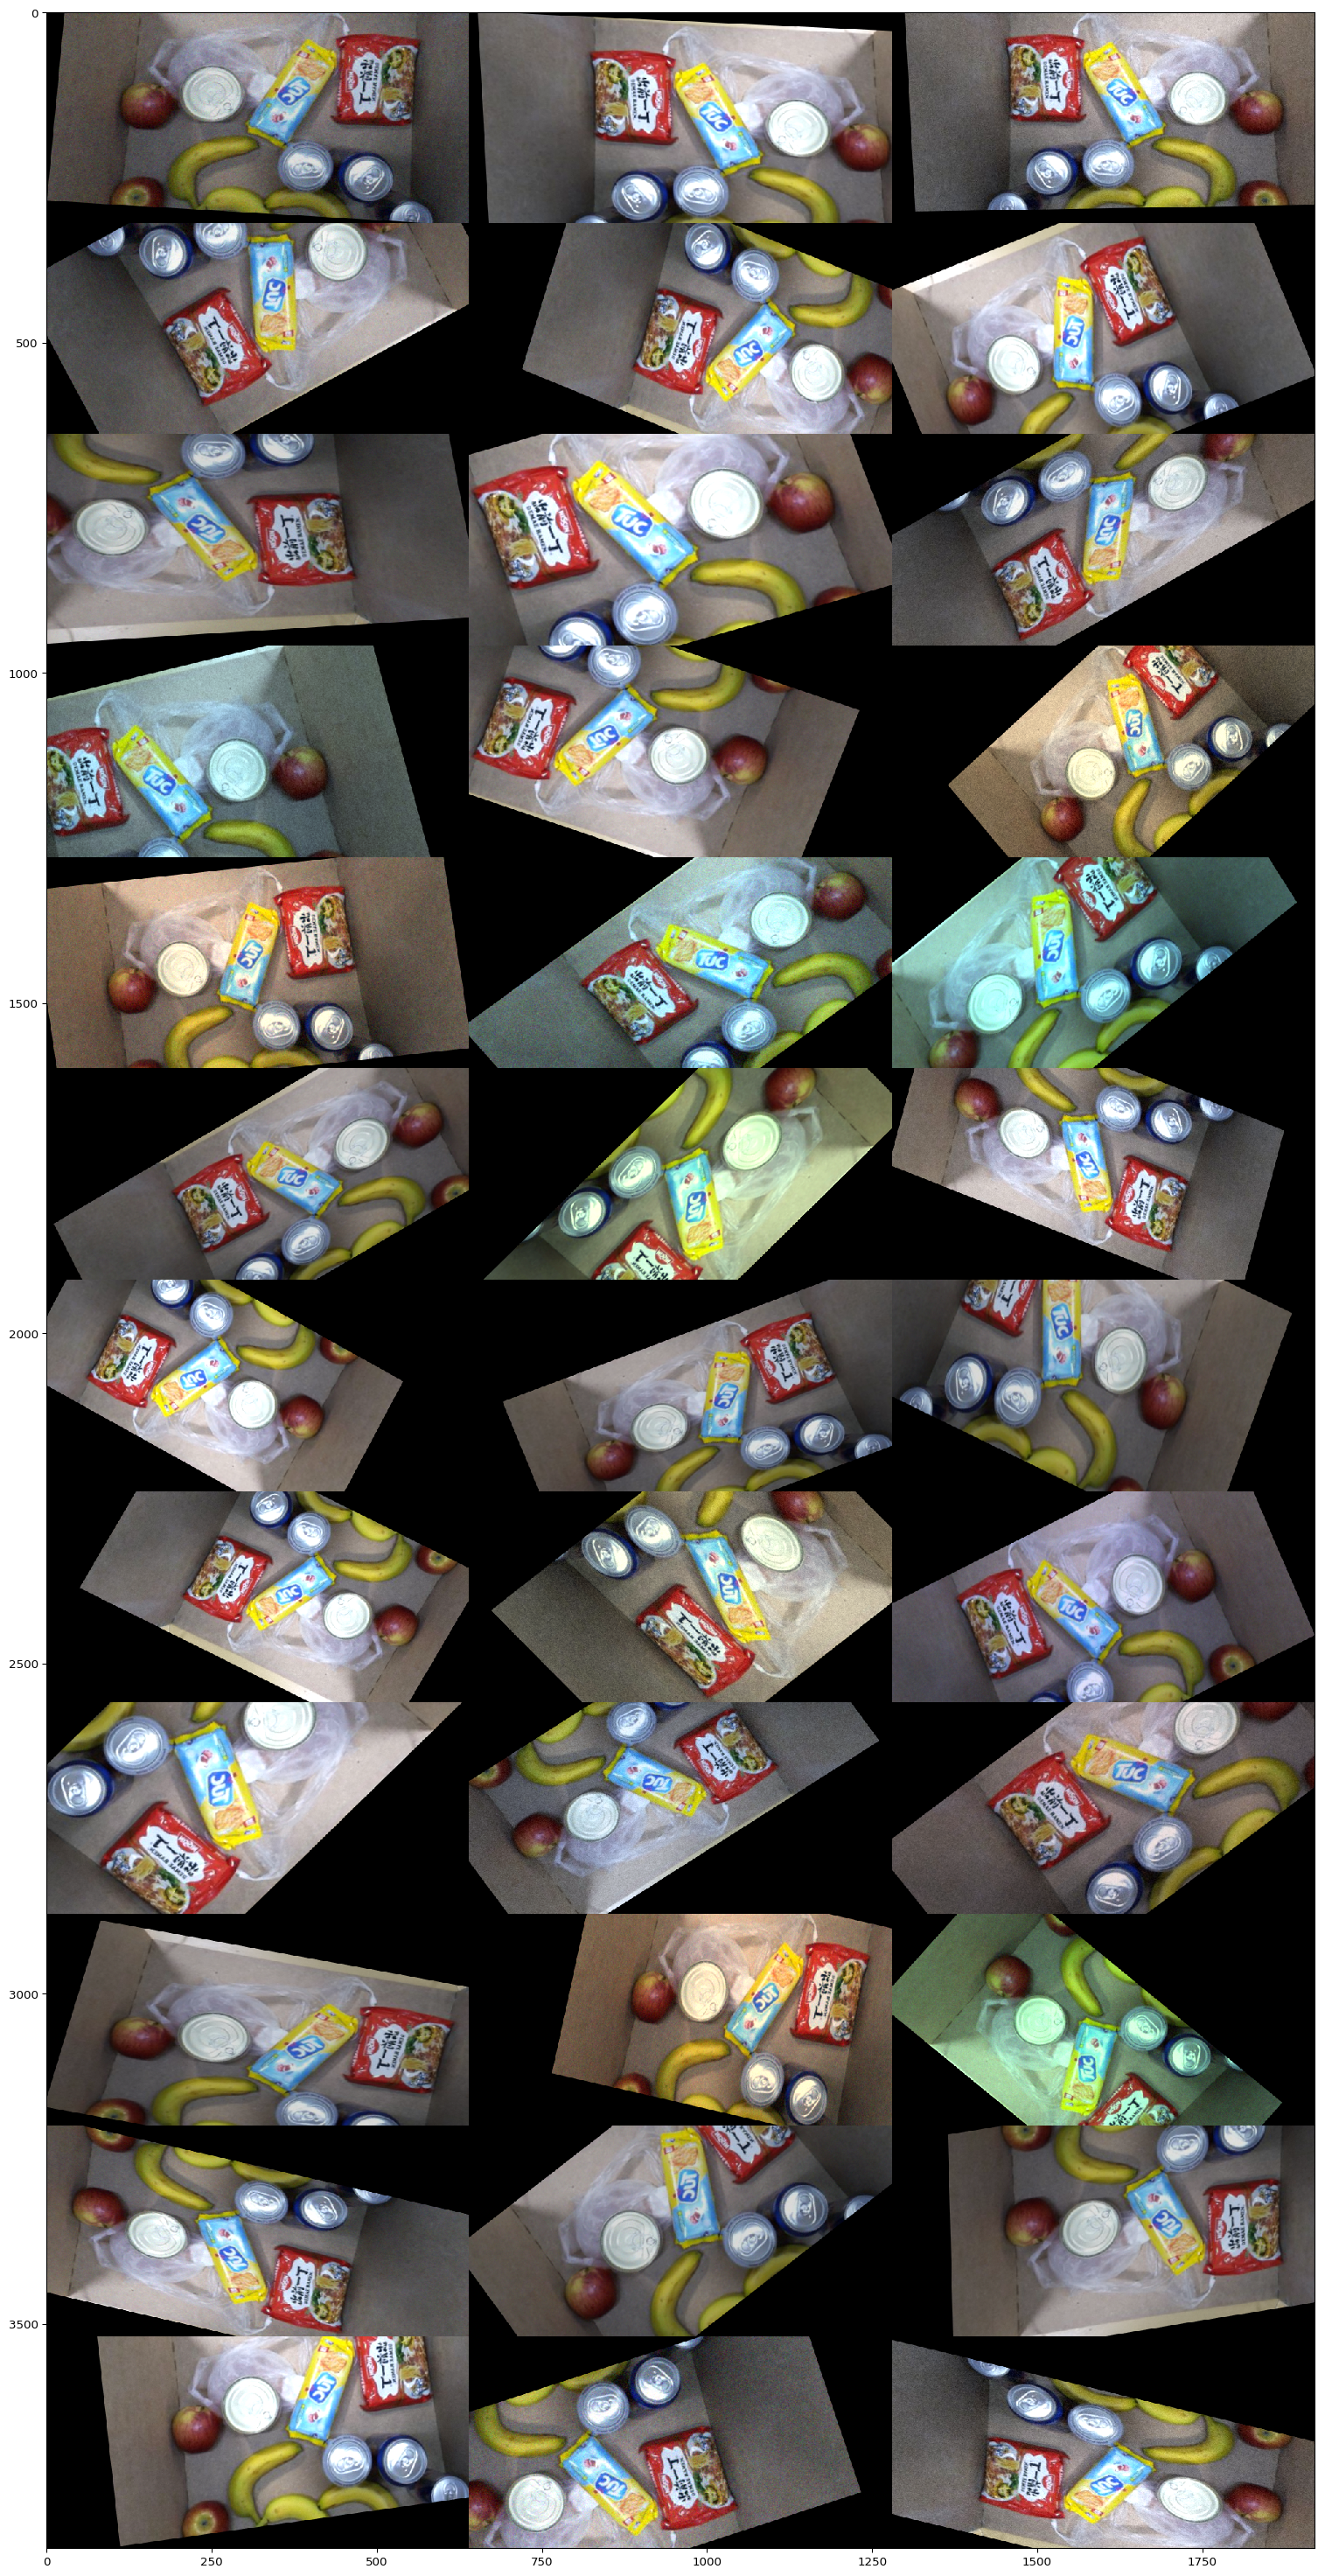

In [20]:
from imgaug import augmenters as iaa
import numpy as np

#images are loadeed above

augmentation = iaa.Sequential([ 
    iaa.Crop(percent=(0, 0.1)), # crop images from each side by 0 to 10pct (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.Flipud(0.5), # vertically flip 50% of all images
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-45, 45),
        shear=(-8, 8)
    )
], random_order=True)

# show an image with 8*8 augmented versions of image 0
augmentation.show_grid(images[0], cols=3, rows=12)